# <pre><center> DATA ANALYSIS ON TITANIC CLASSIFICATION DATASET </center> <br><pre>

<pre>
Name         : data_analysis.ipynb
Description  : This notebook deals with the analysis of titanic classification dataset.
Language     : Python 3.6
Requirements : pandas, numpy, matplotlib
Input files  : ../data/train.csv, ../data/test.csv
               The dataset is downloaded from the kaggle competition 'Titanic - Machine Learning from Disaster'
               Link to the data : https://www.kaggle.com/c/titanic/data


In [45]:
# Import required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read data from the train and test files

In [46]:
# Path to train and test files

TRAIN_DATA_PATH = "../data/train.csv"
TEST_DATA_PATH = "../data/test.csv"

In [47]:
# Read the data from the file 

train_data = pd.read_csv(TRAIN_DATA_PATH, index_col="PassengerId")
test_data = pd.read_csv(TEST_DATA_PATH, index_col="PassengerId")

In [48]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [50]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


## Check for missing values

In [51]:
# Missing values in training data

nan_dict = {
    "columns" : [],
    "missing count" : [],
    "missing percentage" : []
}
nan_count = train_data.isna().sum()
for index in nan_count.index:
    nan_dict["columns"].append(index)
    nan_dict["missing count"].append(nan_count[index])
    nan_dict["missing percentage"].append(round(nan_count[index]/len(train_data)*100, 2))

pd.DataFrame.from_dict(nan_dict)

,columns,missing count,missing percentage
0,Survived,0,0.00
1,Pclass,0,0.00
2,Name,0,0.00
3,Sex,0,0.00
4,Age,177,19.87
5,SibSp,0,0.00
6,Parch,0,0.00
7,Ticket,0,0.00
8,Fare,0,0.00
9,Cabin,687,77.10


In [52]:
# Missing values in test data

nan_dict = {
    "columns" : [],
    "missing count" : [],
    "missing percentage" : []
}
nan_count = test_data.isna().sum()
for index in nan_count.index:
    nan_dict["columns"].append(index)
    nan_dict["missing count"].append(nan_count[index])
    nan_dict["missing percentage"].append(round(nan_count[index]/len(train_data)*100, 2))

pd.DataFrame.from_dict(nan_dict)

,columns,missing count,missing percentage
0,Pclass,0,0.00
1,Name,0,0.00
2,Sex,0,0.00
3,Age,86,9.65
4,SibSp,0,0.00
5,Parch,0,0.00
6,Ticket,0,0.00
7,Fare,1,0.11
8,Cabin,327,36.70
9,Embarked,0,0.00


### Observations regarding the missing values

### Age
* Around 20 percentage missing values are found in train data.
* Around 10 percentage missing values are found in test data.
* We need to decide how to fill the missing values.

### Fare
* One missing value is found in fare.
* We need to decide how to fill the missing value.

### Cabin
* Around 77 percentage missing values are found in train data.
* Around 37 percentage missing values are found in test data.
* We need to decide whether to use this column.

### Embarked
* Less than 1 percentage missing values are found in test data. 
* We need to decide how to fill the missing values.

## Column-wise analysis

### Survived

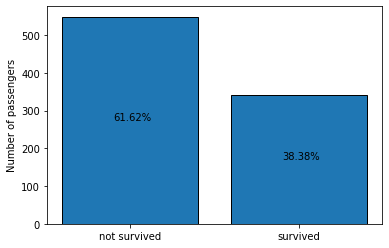

In [53]:
# Obtain target values
labels = train_data["Survived"].replace({0:"not survived", 1:"survived"})
unique_labels = np.unique(labels)

height = []
percentage = []

# Obtain the number of passengers survived and not survivied
for item in unique_labels:
    height.append(list(labels).count(item))
    percentage.append(round(height[-1]/len(labels)*100, 2))

# Plot the graph
plt.bar(unique_labels, height, edgecolor="black")

# Write the percentage values on graph
for index in range(len(unique_labels)):
    plt.text(index-0.1, height[index]/2, str(percentage[index]) + "%")

plt.ylabel("Number of passengers")
plt.show()

### Observations on column 'Survived'

* This is the target variable.
* This column value is 1 if the passenger survived and 0 if the passenger did not survive.
* Number of passengers survived is lesser than the number of passengers who did not survive.
* There is a class imbalance hence we need to address this issue during training.

###  Pclass

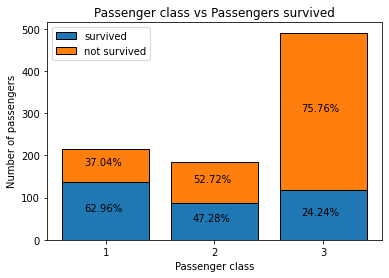

In [54]:
# Placeholder to store the value
value_dict = {"survived" : [], "not survived" : []}

# Get the number of passengers survived and not survived
p_classes = np.unique(train_data["Pclass"])
for p_class in p_classes:
    value_dict["survived"].append(len(train_data[(train_data["Pclass"]==p_class) & (train_data["Survived"]==1)]))
    value_dict["not survived"].append(len(train_data[(train_data["Pclass"]==p_class) & (train_data["Survived"]==0)]))

# Plot the values
plt.bar(p_classes, value_dict["survived"], edgecolor="black", label="survived")
plt.bar(p_classes, value_dict["not survived"], bottom=value_dict["survived"], edgecolor="black", label="not survived")

# Write the percentage on the graph
for index, p_class in enumerate(p_classes):
    plt.text(p_class-0.2, value_dict["survived"][index]/2, 
             str(round((value_dict["survived"][index])/
             (value_dict["survived"][index]+value_dict["not survived"][index])*100,2))+"%")

    plt.text(p_class-0.2, value_dict["survived"][index] + (value_dict["not survived"][index]/2), 
             str(round((value_dict["not survived"][index])/
             (value_dict["survived"][index]+value_dict["not survived"][index])*100, 2))+"%")

plt.legend()
plt.xlabel("Passenger class")
plt.ylabel("Number of passengers")
plt.title("Passenger class vs Passengers survived")
plt.xticks(sorted(p_classes))
plt.show()

### Observations on column 'Pclass'

* This column denotes the class in which the passenger travelled.
* From the data, we can observe that the number of passenger in third class is higher than the other two classes.
* The passengers travelled in third class had the least rate of survival compared to other two classes.
* This column is already a numerical column hence no further processing is required.

### Name

We cannot directly use the names. We can extract the titles from the names and analyse based on the title

In [55]:
# Extract titles
titles = []
for item in train_data["Name"]:
    title = item[item.index(",")+1:item.index(".")].strip()
    titles.append(title)

titles = pd.Series(titles, index=train_data.index)
unique_titles = list(set(titles))

value_dict = {"Title" : [], "Count" : [], "survived" : [], "not survived" : [], "survival rate" : [],
              "Max Age" : [], "Min Age" : [], "Mean Age" : []}

# Obtain the title-wise age and survivor count
for title in unique_titles:
    value_dict["survived"].append(len(train_data[(titles==title) & (train_data["Survived"]==1)]))
    value_dict["not survived"].append(len(train_data[(titles==title) & (train_data["Survived"]==0)]))
    value_dict["survival rate"].append(round(value_dict["survived"][-1]/(value_dict["survived"][-1] + value_dict["not survived"][-1])*100, 2))
    value_dict["Title"].append(title)
    value_dict["Count"].append(titles.value_counts()[title])
    value_dict["Max Age"].append(max(train_data[titles==title]["Age"]))
    value_dict["Min Age"].append(min(train_data[titles==title]["Age"]))
    value_dict["Mean Age"].append(np.mean(train_data[titles==title]["Age"])) 

pd.DataFrame.from_dict(value_dict)



,Title,Count,survived,not survived,survival rate,Max Age,Min Age,Mean Age
0,Mr,517,81,436,15.67,80.0,11.00,32.368090
1,Jonkheer,1,0,1,0.00,38.0,38.00,38.000000
2,Rev,6,0,6,0.00,57.0,27.00,43.166667
3,Dr,7,3,4,42.86,54.0,23.00,42.000000
4,Mme,1,1,0,100.00,24.0,24.00,24.000000
5,Lady,1,1,0,100.00,48.0,48.00,48.000000
6,Sir,1,1,0,100.00,49.0,49.00,49.000000
7,Miss,182,127,55,69.78,63.0,0.75,21.773973
8,Ms,1,1,0,100.00,28.0,28.00,28.000000
9,Major,2,1,1,50.00,52.0,45.00,48.500000


#### Observations on column 'Name'

* The commonly occuring titles are Mr, Master, Mrs and Miss.
* Other titles are not frequently occuring.
* As per the titles, Passengers with titles Master, Mrs and Miss has higher survival rate when compared to passengers with title Mr.
* The information from title is redundant since it mostly has a combined information from Age and Sex.

### Sex

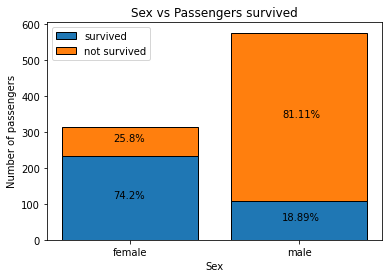

In [56]:
# Placeholder to store the value
value_dict = {"survived" : [], "not survived" : []}

# Identify the number of passengers survived and not survived
genders = np.unique(train_data["Sex"])
for sex in genders:
    value_dict["survived"].append(len(train_data[(train_data["Sex"]==sex) & (train_data["Survived"]==1)]))
    value_dict["not survived"].append(len(train_data[(train_data["Sex"]==sex) & (train_data["Survived"]==0)]))

# Plot the graphs
plt.bar(genders, value_dict["survived"], edgecolor="black", label="survived")
plt.bar(genders, value_dict["not survived"], bottom=value_dict["survived"], edgecolor="black", label="not survived")

# Write the percentage on the plot
for index, sex in enumerate(genders):
    plt.text(index-0.1, value_dict["survived"][index]/2, 
             str(round((value_dict["survived"][index])/
             (value_dict["survived"][index]+value_dict["not survived"][index]), 4)*100)+"%")

    plt.text(index-0.1, value_dict["survived"][index] + (value_dict["not survived"][index]/2), 
             str(round((value_dict["not survived"][index])/
             (value_dict["survived"][index]+value_dict["not survived"][index]), 4)*100)+"%")

plt.legend(["survived", "not survived"])
plt.xlabel("Sex")
plt.ylabel("Number of passengers")
plt.title("Sex vs Passengers survived")
plt.show()


### Observations on column 'Sex'

* The number of male passengers are higher than female passengers.
* The survival rate of female passengers are higher than male passengers.
* The values are categorical and need to be converted to numerical for training a model.

In [57]:
def plot_values(value_dict, width, min_value):
    """
    Function to write percentage on bar graph

    value_dict : (dict) Dictionary containing x-axis range, number of passengers survived 
                 and number of passengers not survived
                 {"range" : [...], "survived" : [], "not survived" : []}
    width      : (int) Width of the bar
    min_value  : (int) Min height of bar to write values inside bar 
    """

    for index, value in enumerate(value_dict["range"]):

        # Check if the values are written inside or outside the bars
        if value_dict["survived"][index] < min_value or value_dict["not survived"][index] < min_value:
            lower_height = value_dict["survived"][index] + value_dict["not survived"][index] + (min_value/4)
            upper_height = value_dict["survived"][index] + value_dict["not survived"][index] + min_value

        else:
            lower_height = value_dict["survived"][index]/2
            upper_height = value_dict["survived"][index] + (value_dict["not survived"][index]/2)

        # Write the percentages on the graph
        try:
            plt.text(value-(width/3), lower_height,
                    str(round((value_dict["survived"][index])/
                    (value_dict["survived"][index]+value_dict["not survived"][index])*100, 1))+"%")

            plt.text(value-(width/3), upper_height,  
                    str(round((value_dict["not survived"][index])/
                    (value_dict["survived"][index]+value_dict["not survived"][index])*100, 1))+"%")

        # Exception when no values found in the range
        except ZeroDivisionError:
            pass

### Age

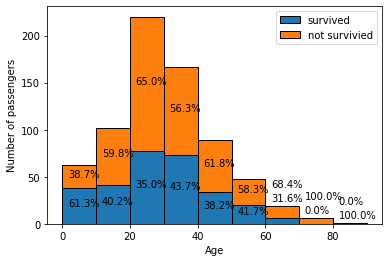

In [58]:
# Obtain the age of passengers who survived and not survived
survived_ages = train_data[train_data["Survived"]==1]["Age"]
not_survived_ages = train_data[train_data["Survived"]==0]["Age"]

# Get the range of values
max_age = int(np.ceil(train_data["Age"].max()))
min_age = int(np.floor(train_data["Age"].min()))
width = 10 # Based on the values

# Place holder to store the values
value_dict = {"range" : [], "survived" : [], "not survived" : []}

# Obtain the passenger count in each range
for cur_range in range(min_age, max_age+width, width):
    value_dict["survived"].append(len(survived_ages[(survived_ages >= cur_range) & (survived_ages < cur_range + width)]))
    value_dict["not survived"].append(len(not_survived_ages[(not_survived_ages >= cur_range) & (not_survived_ages < cur_range + width)]))
    value_dict["range"].append(cur_range+(width/2))

# Plot the graph
plt.bar(value_dict["range"], value_dict["survived"], width=width, edgecolor="black", label="survived")
plt.bar(value_dict["range"], value_dict["not survived"], bottom=value_dict["survived"], width=width, edgecolor="black", label="not survivied")

# Write the percentage values on the graph
plot_values(value_dict, width, min_value=20)

plt.legend()
plt.xlabel("Age")
plt.ylabel("Number of passengers")
plt.show()

### Observations on column 'Age'

* There are more passengers in the age group 20 to 40 compared to other age groups.
* The passengers with Age less than 10 had a higher chance of survival compared to other age groups.
* The values are continuous and normalization can be considered for this column.
* This column contains missing values which cannot be removed since Age can hold significant information.
* We need to decide a technique to fill the missing values.

### Parch

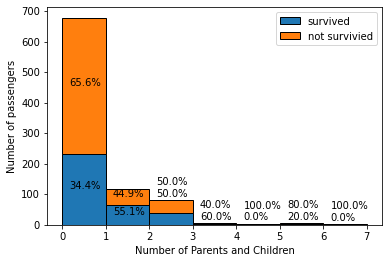

In [59]:
# Obtain the Parch value for passengers who survived and not survived
survived_parch = train_data[train_data["Survived"]==1]["Parch"]
not_survived_parch = train_data[train_data["Survived"]==0]["Parch"]

# Get the range of values
max_parch = int(np.ceil(train_data["Parch"].max()))
min_parch = int(np.floor(train_data["Parch"].min()))
width = 1

# Placeholders to store the values
value_dict = {"range" : [], "survived" : [], "not survived" : []}

# Obtain the passenger count in each range
for cur_range in range(min_parch, max_parch+width, width):
    value_dict["survived"].append(len(survived_parch[(survived_parch >= cur_range) & (survived_parch < cur_range + width)]))
    value_dict["not survived"].append(len(not_survived_parch[(not_survived_parch >= cur_range) & (not_survived_parch < cur_range + width)]))
    value_dict["range"].append(cur_range+(width/2))

# Plot the graph
plt.bar(value_dict["range"], value_dict["survived"], width=width, edgecolor="black", label="survived")
plt.bar(value_dict["range"], value_dict["not survived"], bottom=value_dict["survived"], width=width, edgecolor="black", label="not survivied")

# Plot the percentage values
plot_values(value_dict, width,  min_value=50)

plt.legend()
plt.xlabel("Number of Parents and Children")
plt.ylabel("Number of passengers")
plt.show()

### Observations on column 'Parch'

* The number of passengers without Parents or Children on board are higher.
* The passengers without Parents or Children on board had a lower chance of survival compared to others.
* This is a discrete numerical column and does not require further preprocessing.

### SibSp

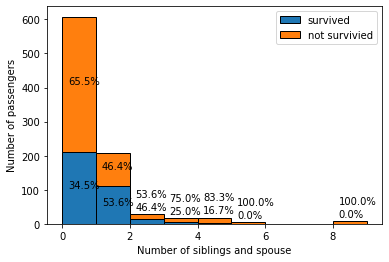

In [60]:
# Obtain the SibSp value for passengers who survived and not survived
survived_sibsp = train_data[train_data["Survived"]==1]["SibSp"]
not_survived_sibsp = train_data[train_data["Survived"]==0]["SibSp"]

# Obtain the range of Sibsp value
max_sibsp = int(np.ceil(train_data["SibSp"].max()))
min_sibsp = int(np.floor(train_data["SibSp"].min()))
width = 1

# Place holder to store the count values
value_dict = {"range" : [], "survived" : [], "not survived" : []}

# Obtain the passenger count in each range
for cur_range in range(min_sibsp, max_sibsp+width, width):
    value_dict["survived"].append(len(survived_sibsp[(survived_sibsp >= cur_range) & (survived_sibsp < cur_range + width)]))
    value_dict["not survived"].append(len(not_survived_sibsp[(not_survived_sibsp >= cur_range) & (not_survived_sibsp < cur_range + width)]))
    value_dict["range"].append(cur_range+(width/2))

# Plot the graph
plt.bar(value_dict["range"], value_dict["survived"], width=width, edgecolor="black", label="survived")
plt.bar(value_dict["range"], value_dict["not survived"], bottom=value_dict["survived"], width=width, edgecolor="black", label="not survivied")

# Write the percentage values on the graph
plot_values(value_dict, width, min_value=50)

plt.legend()
plt.xlabel("Number of siblings and spouse")
plt.ylabel("Number of passengers")
plt.show()

### Observations on column 'SibSp'

* The number of passengers without Sibilings or Spouse on board are higher.
* The passengers without Siblings or Spouse on board had a lower chance of survival compared to others.
* The passengers with single sibling or spouse on board had a higher chance of survival compared to others.
* This is a discrete numerical column and does not require further preprocessing.

### Fare

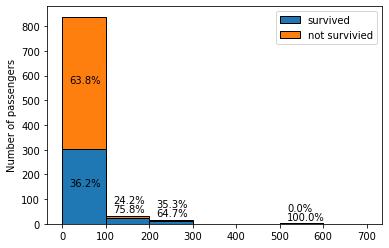

In [61]:
# Obtain the fare of passengers who survived and not survived
survived_fare = train_data[train_data["Survived"]==1]["Fare"]
not_survived_fare = train_data[train_data["Survived"]==0]["Fare"]

# Obtain the range of fare
max_fare = int(np.ceil(train_data["Fare"].max()))
min_fare = int(np.floor(train_data["Fare"].min()))
width = 100

# Place holder to store the count values
value_dict = {"range" : [], "survived" : [], "not survived" : []}

# Obtain the passenger count in each range
for cur_range in range(min_fare, max_fare+width, width):
    value_dict["survived"].append(len(survived_fare[(survived_fare >= cur_range) & (survived_fare < cur_range + width)]))
    value_dict["not survived"].append(len(not_survived_fare[(not_survived_fare >= cur_range) & (not_survived_fare < cur_range + width)]))
    value_dict["range"].append(cur_range+(width/2))

# Plot the graph
plt.bar(value_dict["range"], value_dict["survived"], width=width, edgecolor="black", label="survived")
plt.bar(value_dict["range"], value_dict["not survived"], bottom=value_dict["survived"], width=width, edgecolor="black", label="not survivied")

# Write the percentage on graph
plot_values(value_dict, width, min_value=50)

plt.legend()
plt.ylabel("Number of passengers")
plt.show()

### Observations on column 'Fare'

* The number of passengers with fare less than 100 are higher.
* The passengers with lesser fare had a lower chance of survival that the passengers with higher fare.
* This is a continuous numerical column and can be normalized further.

### Cabin and Ticket

In [62]:
train_data["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
F33            3
E101           3
              ..
E77            1
E68            1
C148           1
B82 B84        1
D11            1
Name: Cabin, Length: 147, dtype: int64

Multiple Cabins are found in a same row.

In [63]:
train_data[train_data["Cabin"]== "C23 C25 C27"]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S
89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,C23 C25 C27,S
342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,C23 C25 C27,S
439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S


In [65]:
train_data["Ticket"].value_counts()

1601                 7
347082               7
CA. 2343             7
347088               6
CA 2144              6
                    ..
26707                1
3411                 1
STON/O 2. 3101280    1
349245               1
315153               1
Name: Ticket, Length: 681, dtype: int64

### Observation on column 'Cabin' and 'Ticket'

* There are lot of unique values in Ticket. Hence it can be dropped.
* Cabin column has a lot of missing values. We need to decide whether to fill the missing values or drop the column.

### Embarked

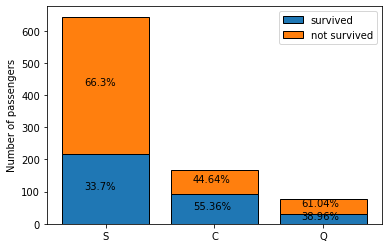

In [64]:
# Place holder to store the value
value_dict = {"survived" : [], "not survived" : []}

# Get the embarked values
embarked = list(set(train_data["Embarked"]))
embarked.remove(np.nan)

# Get the passenger count in each category
for cur_embarked in embarked:
    value_dict["survived"].append(len(train_data[(train_data["Embarked"]==cur_embarked) & (train_data["Survived"]==1)]))
    value_dict["not survived"].append(len(train_data[(train_data["Embarked"]==cur_embarked) & (train_data["Survived"]==0)]))

# Plot the graph
plt.bar(embarked, value_dict["survived"], edgecolor="black", label="survived")
plt.bar(embarked, value_dict["not survived"], bottom=value_dict["survived"], edgecolor="black", label="not survived")

# Write the percentage values on graph
for index, p_class in enumerate(embarked):
    plt.text(index-0.2, value_dict["survived"][index]/2, 
             str(round((value_dict["survived"][index])/
             (value_dict["survived"][index]+value_dict["not survived"][index])*100,2))+"%")

    plt.text(index-0.2, value_dict["survived"][index] + (value_dict["not survived"][index]/2), 
             str(round((value_dict["not survived"][index])/
             (value_dict["survived"][index]+value_dict["not survived"][index])*100, 2))+"%")

plt.legend()
plt.ylabel("Number of passengers")
plt.show()

### Observation on column 'Embarked'

* More passengers boarded the ship from 'Southampton'.
* From visual analysis, we cannot state a direct relationship between embarked location and survival.
* There are few missing values which needs to be handled.

_____________________________________________________________________________________________________________

## <u> DATA ANALYSIS OBSERVATIONS </u>

### Observations on column 'Survived'

* This is the target variable.
* Number of passengers survived is lesser than the number of passengers who did not survive.
* There is a class imbalance hence we need to address this issue during training.

### Observations on column 'Pclass'

* This column denotes the class in which the passenger travelled.
* From the data, we can observe that the number of passenger in third class is higher than the other two classes.
* The passengers travelled in third class had the least rate of survival compared to other two classes.

### Observations on column 'Name'

* The commonly occuring titles are Mr, Master, Mrs and Miss.
* As per the titles, Passengers with titles Master, Mrs and Miss has higher survival rate when compared to passengers with title Mr.
* The information from title is redundant since it mostly has a combined information from Age and Sex.

### Observations on column 'Sex'

* The number of male passengers are higher than female passengers.
* The survival rate of female passengers are higher than male passengers.
* The values are categorical and need to be converted to numerical for training a model.

### Observations on column 'Age'

* There are more passengers in the age group 20 to 40 compared to other age groups.
* The passengers with Age less than 10 had a higher chance of survival compared to other age groups.
* The values are continuous and normalization can be considered for this column.
* This column contains missing values which cannot be removed since Age can hold significant information.
* We need to decide a technique to fill the missing values on both train and test dataset.

### Observations on column 'Parch'

* The number of passengers without Parents or Children on board are higher.
* The passengers without Parents or Children on board had a lower chance of survival compared to others.
* This is a discrete numerical column and does not require further preprocessing.

### Observations on column 'SibSp'

* The number of passengers without Sibilings or Spouse on board are higher.
* The passengers without Siblings or Spouse on board had a lower chance of survival compared to others.
* The passengers with single sibling or spouse on board had a higher chance of survival compared to others.
* This is a discrete numerical column and does not require further preprocessing.

### Observations on column 'Fare'

* The number of passengers with fare less than 100 are higher.
* The passengers with lesser fare had a lower chance of survival that the passengers with higher fare.
* This is a continuous numerical column and can be normalized further.

### Observation on column 'Cabin' and 'Ticket'

* There are lot of unique values in Ticket. Hence it can be dropped.
* Cabin column has a lot of missing values. We need to decide whether to fill the missing values or drop the column.

### Observation on column 'Embarked'

* More passengers boarded the ship from 'Southampton'.
* From visual analysis, we cannot state a direct relationship between embarked location and survival.
* There are few missing values which needs to be handled.



________________

## <u> FURTHER STEPS TO BE DONE </u>

* The values is column 'sex' are categorical and need to be converted to numerical for training a model.
* The missing values in column 'Age' are to be filled in both train and test data.
* The column 'Age' can be normalized since it has continuous value.
* One missing value is found in test data in 'Fare' which can be filled based on Embarked and Pclass.
* The column 'Fare' can be normalized since it has continuous value.
* The missing values in column 'Embarked' are to be filled in train data. 
* The column 'Embarked' is a categorical column and it needs to be converted to numerical column.
* The column 'Embarked' may not contain relevent information but we can try with and without this information.
* The column 'Name' can be dropped as it may not hold relevant information.
* The column 'Cabin' can be dropped as it has more than 70% missing values.